# Exploratory Data Analysis - Wheat Pricing Data
## Time Series and Machine Learning Final Project Code
## Will Bartlett and David Whitmer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
df = pd.read_csv('../Final Data/Final_Data.csv')
df.head(5)

,date,wheat_price,fertilizer_idx,avg_temp,drought_idx,cpi,commodity_imp_idx,commodity_exp_idx,flour_price,corn_price,crude_oil_price
0,1990-01-01,3.71,114.4,-1.218474,15.3,127.5,92.5,95.2,0.253,105.900513,22.86
1,1990-02-01,3.56,120.1,-1.965352,14.6,128.0,92.7,94.6,0.249,106.294167,22.11
2,1990-03-01,3.48,119.6,4.222106,11.2,128.6,92.4,94.8,0.252,109.837318,20.39
3,1990-04-01,3.49,119.1,9.391660,8.0,128.9,91.6,95.1,0.251,118.498337,18.43
4,1990-05-01,3.40,115.8,13.738063,7.1,129.1,91.2,95.3,0.254,121.254097,18.20


In [4]:
#Summary Statistics
df.describe()

,wheat_price,fertilizer_idx,avg_temp,drought_idx,cpi,commodity_imp_idx,commodity_exp_idx,flour_price,corn_price,crude_oil_price
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,4.802684,267.691401,9.615600,8.242518,207.479539,115.452969,116.157482,0.390373,161.065277,51.286247
std,1.859205,133.648220,8.887806,6.984253,49.347140,18.113002,17.447203,0.114963,67.437910,29.241347
min,2.220000,112.400000,-4.353508,0.100000,127.500000,90.500000,94.600000,0.218000,75.057375,11.350000
25%,3.370000,147.100000,1.511006,2.800000,163.900000,97.500000,99.700000,0.293000,105.767632,22.390000
50%,4.450000,263.700000,9.515254,6.500000,207.603000,117.200000,115.800000,0.355000,152.587620,48.040000
75%,5.880000,365.200000,18.395140,11.900000,238.992000,129.500000,127.300000,0.512000,190.227211,74.410000
max,10.900000,774.068000,23.197271,32.400000,319.775000,148.500000,166.700000,0.575000,348.507117,133.880000


In [5]:
#Correlation coefficients
df_corr = df.drop(columns = 'date')
corr = df_corr.corr()
corr

,wheat_price,fertilizer_idx,avg_temp,drought_idx,cpi,commodity_imp_idx,commodity_exp_idx,flour_price,corn_price,crude_oil_price
wheat_price,1.000000,0.876671,-0.044566,0.178007,0.695189,0.856117,0.844933,0.725834,0.903145,0.812742
fertilizer_idx,0.876671,1.000000,0.005603,0.143726,0.834721,0.917883,0.932209,0.806787,0.879867,0.841645
avg_temp,-0.044566,0.005603,1.000000,0.042128,0.037481,0.049661,0.039099,0.080780,0.013380,0.069797
drought_idx,0.178007,0.143726,0.042128,1.000000,0.098184,0.141798,0.119775,0.034919,0.282349,0.191389
cpi,0.695189,0.834721,0.037481,0.098184,1.000000,0.879109,0.935893,0.869238,0.691978,0.717663
commodity_imp_idx,0.856117,0.917883,0.049661,0.141798,0.879109,1.000000,0.955890,0.901318,0.868021,0.927108
commodity_exp_idx,0.844933,0.932209,0.039099,0.119775,0.935893,0.955890,1.000000,0.864435,0.861682,0.824782
flour_price,0.725834,0.806787,0.080780,0.034919,0.869238,0.901318,0.864435,1.000000,0.729524,0.789928
corn_price,0.903145,0.879867,0.013380,0.282349,0.691978,0.868021,0.861682,0.729524,1.000000,0.799848
crude_oil_price,0.812742,0.841645,0.069797,0.191389,0.717663,0.927108,0.824782,0.789928,0.799848,1.000000


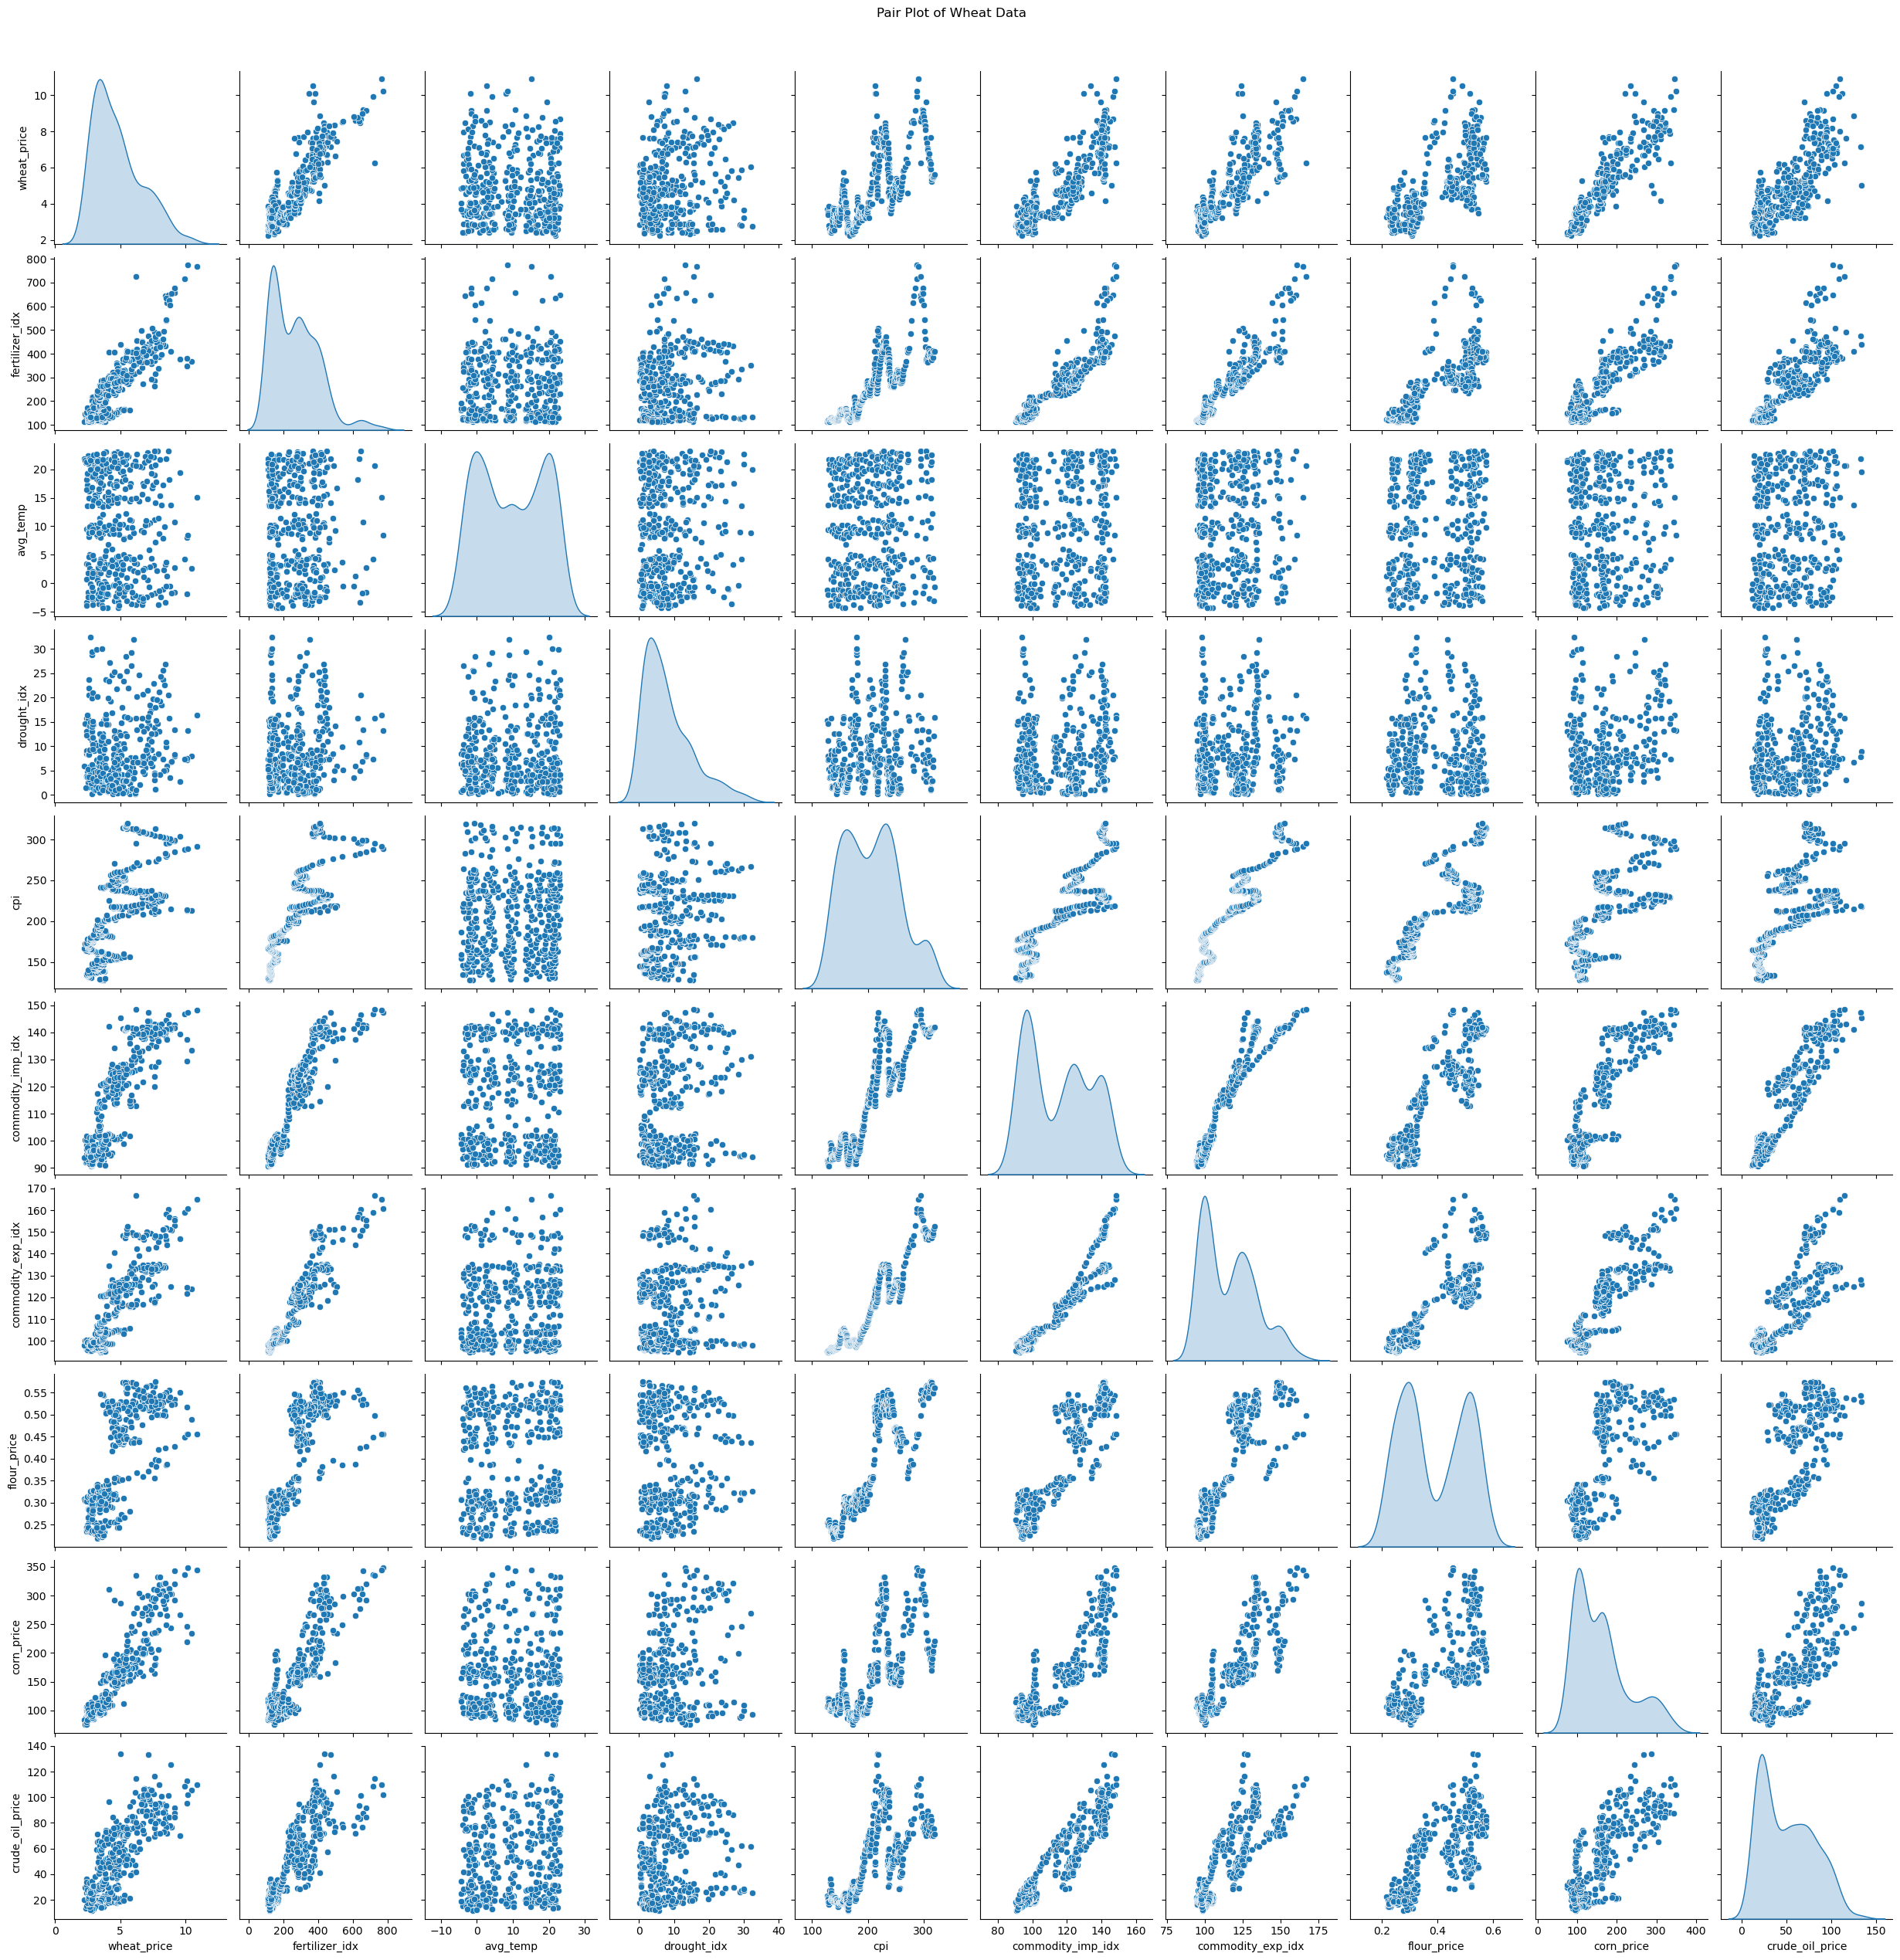

In [6]:
#pairplot
sns.pairplot(df_corr, diag_kind='kde')
plt.suptitle('Pair Plot of Wheat Data', y=1.02)
plt.show()

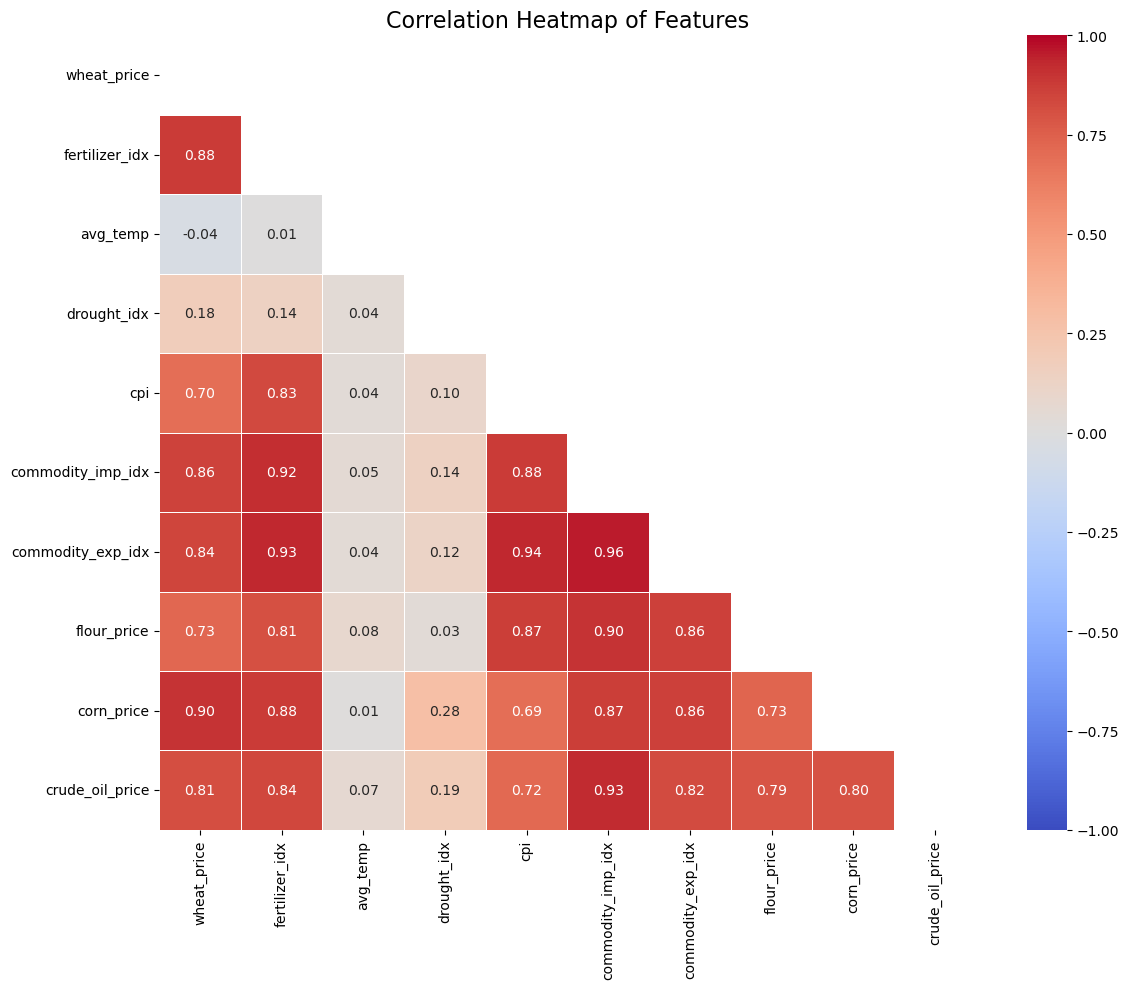

In [7]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.savefig('../Visualizations/Correlation_Heatmap.png')
plt.show()

In [8]:
#make date index
df_vis = df.copy()
df_vis = df.set_index('date')

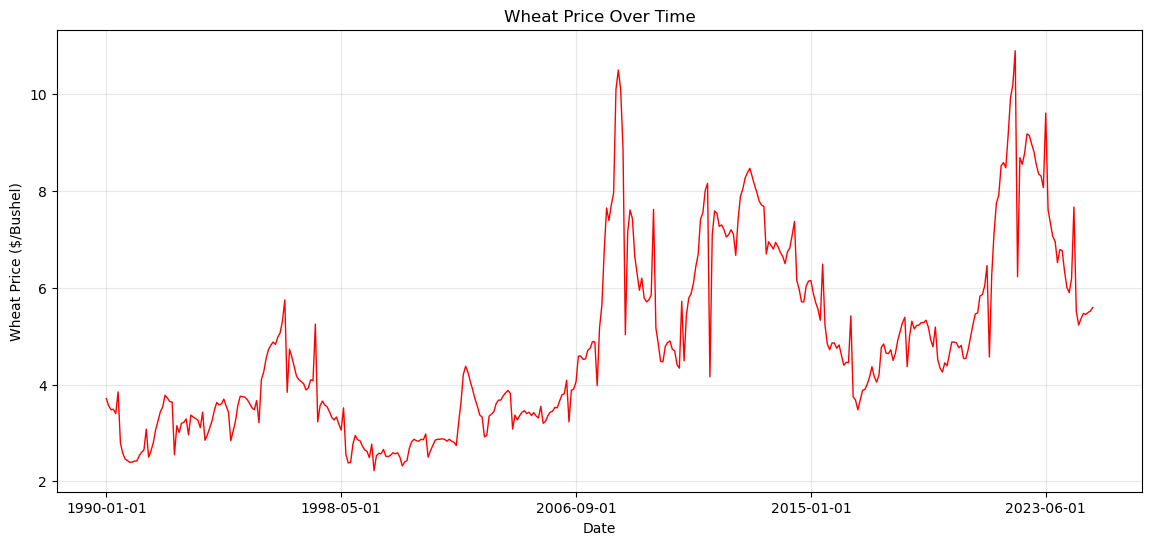

In [9]:
#plot wheat price time series
df_vis['wheat_price'].plot(color='r', linewidth=1, x_compat=True)

# Add labels
plt.title('Wheat Price Over Time')
plt.xlabel('Date')
plt.ylabel('Wheat Price ($/Bushel)')
plt.gcf().set_size_inches(14, 6)
plt.grid(True, alpha=0.3)
plt.savefig('../Visualizations/Wheat_Price_TS.png')
plt.show()

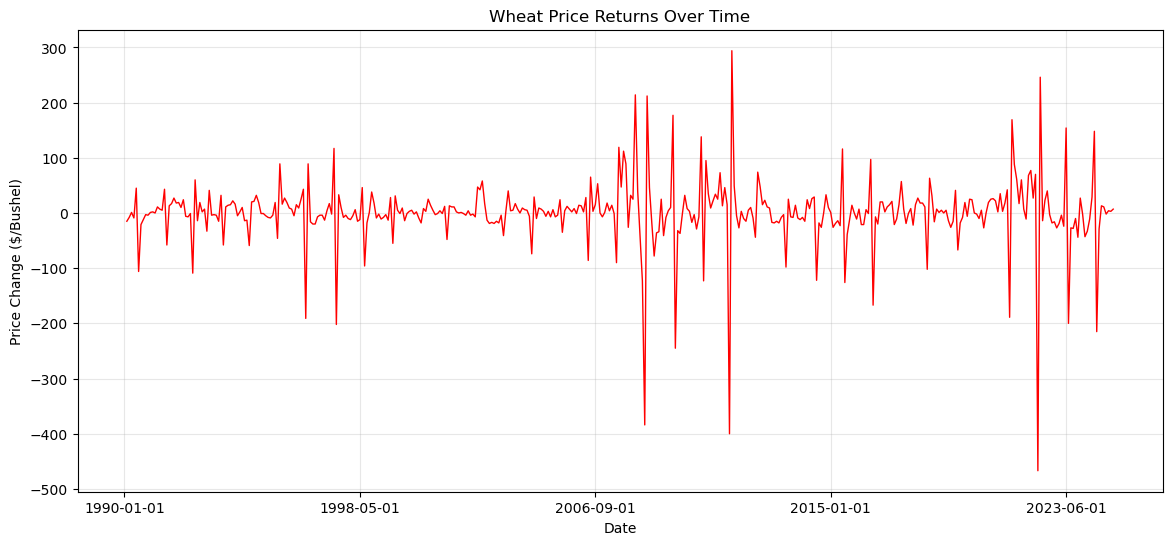

In [10]:
#Plot Price Change time series
df_vis['Wheat_Returns'] = (df_vis['wheat_price'].diff() * 100).dropna() #calculate change
df_vis['Wheat_Returns'].plot(color='r', linewidth=1, x_compat=True)

# Add labels
plt.title('Wheat Price Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change ($/Bushel)')
plt.gcf().set_size_inches(14, 6)
plt.grid(True, alpha=0.3)
plt.savefig('../Visualizations/Wheat_Price_Change_TS.png')
plt.show()

In [11]:
#Test Time Series for Non-Stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    #result = adfuller(series, regression='ct')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] < 0.01:
        print("The series is stationary (reject H0).")
    else:
        print("The series is non-stationary (fail to reject H0). Differentiating is needed.")
adf_test(df['wheat_price'])

ADF Statistic: -2.424836148211882
p-value: 0.13484892767533507
Critical Values: {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}
The series is non-stationary (fail to reject H0). Differentiating is needed.


In [12]:
#Test differentials for Non-Stationarity
df['Price_Change'] = df['wheat_price'].diff()
df = df.dropna()
adf_test(df['Price_Change'])

ADF Statistic: -13.556218850800855
p-value: 2.3571727402284735e-25
Critical Values: {'1%': -3.4461675720270404, '5%': -2.8685128587855955, '10%': -2.5704843086630915}
The series is stationary (reject H0).


# Change dataframe

In [14]:
df_diff = pd.read_csv('../Final Data/df_diff.csv')
df_diff.head(5)

,wheat_price_change,fertilizer_idx_change,avg_temp_change,drought_idx_change,cpi_change,commodity_imp_idx_change,commodity_exp_idx_change,flour_price_change,corn_price_change,crude_oil_price_change
0,-0.15,5.7,-0.746878,-0.7,0.5,0.2,-0.6,-0.004,0.393654,-0.75
1,-0.08,-0.5,6.187458,-3.4,0.6,-0.3,0.2,0.003,3.543152,-1.72
2,0.01,-0.5,5.169554,-3.2,0.3,-0.8,0.3,-0.001,8.661018,-1.96
3,-0.09,-3.3,4.346403,-0.9,0.2,-0.4,0.2,0.003,2.755760,-0.23
4,0.45,-3.4,6.257712,0.2,0.8,-0.4,-0.2,0.005,-1.181030,-1.50


In [15]:
#Summary Statistics
df_diff.describe()

,wheat_price_change,fertilizer_idx_change,avg_temp_change,drought_idx_change,cpi_change,commodity_imp_idx_change,commodity_exp_idx_change,flour_price_change,corn_price_change,crude_oil_price_change
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.004476,0.703743,0.001287,0.001429,0.457798,0.117857,0.136190,0.000733,0.274652,0.115881
std,0.622622,14.556293,4.727206,2.766808,0.630896,1.401326,1.048365,0.013007,11.294033,4.870357
min,-4.670000,-79.890000,-9.130367,-9.700000,-3.842000,-9.600000,-6.200000,-0.083000,-50.920911,-27.500000
25%,-0.120000,-3.825000,-4.343351,-1.400000,0.200000,-0.425000,-0.200000,-0.005000,-3.612590,-1.642500
50%,0.020000,0.600000,0.250700,0.000000,0.400000,0.200000,0.100000,0.000000,0.225824,0.430000
75%,0.180000,5.700000,4.453748,1.425000,0.702750,0.700000,0.600000,0.006000,4.590837,2.370000
max,2.940000,76.584000,10.179702,10.500000,3.773000,4.300000,6.000000,0.042000,65.669931,16.860000


In [16]:
df_diff.corr()

,wheat_price_change,fertilizer_idx_change,avg_temp_change,drought_idx_change,cpi_change,commodity_imp_idx_change,commodity_exp_idx_change,flour_price_change,corn_price_change,crude_oil_price_change
wheat_price_change,1.000000,0.044200,-0.098684,-0.063279,-0.039680,0.033745,0.007115,0.034658,0.118981,0.000630
fertilizer_idx_change,0.044200,1.000000,-0.105239,-0.030017,0.245918,0.279568,0.344933,-0.070590,0.278417,0.151702
avg_temp_change,-0.098684,-0.105239,1.000000,0.073795,0.062199,0.152906,0.092586,0.242311,-0.015616,0.160397
drought_idx_change,-0.063279,-0.030017,0.073795,1.000000,0.053272,0.038983,0.064325,0.002564,0.117740,-0.036913
cpi_change,-0.039680,0.245918,0.062199,0.053272,1.000000,0.688461,0.629740,0.082278,0.226612,0.559909
commodity_imp_idx_change,0.033745,0.279568,0.152906,0.038983,0.688461,1.000000,0.649495,0.097997,0.259846,0.802783
commodity_exp_idx_change,0.007115,0.344933,0.092586,0.064325,0.629740,0.649495,1.000000,0.073328,0.400121,0.608398
flour_price_change,0.034658,-0.070590,0.242311,0.002564,0.082278,0.097997,0.073328,1.000000,0.033673,0.066314
corn_price_change,0.118981,0.278417,-0.015616,0.117740,0.226612,0.259846,0.400121,0.033673,1.000000,0.235115
crude_oil_price_change,0.000630,0.151702,0.160397,-0.036913,0.559909,0.802783,0.608398,0.066314,0.235115,1.000000


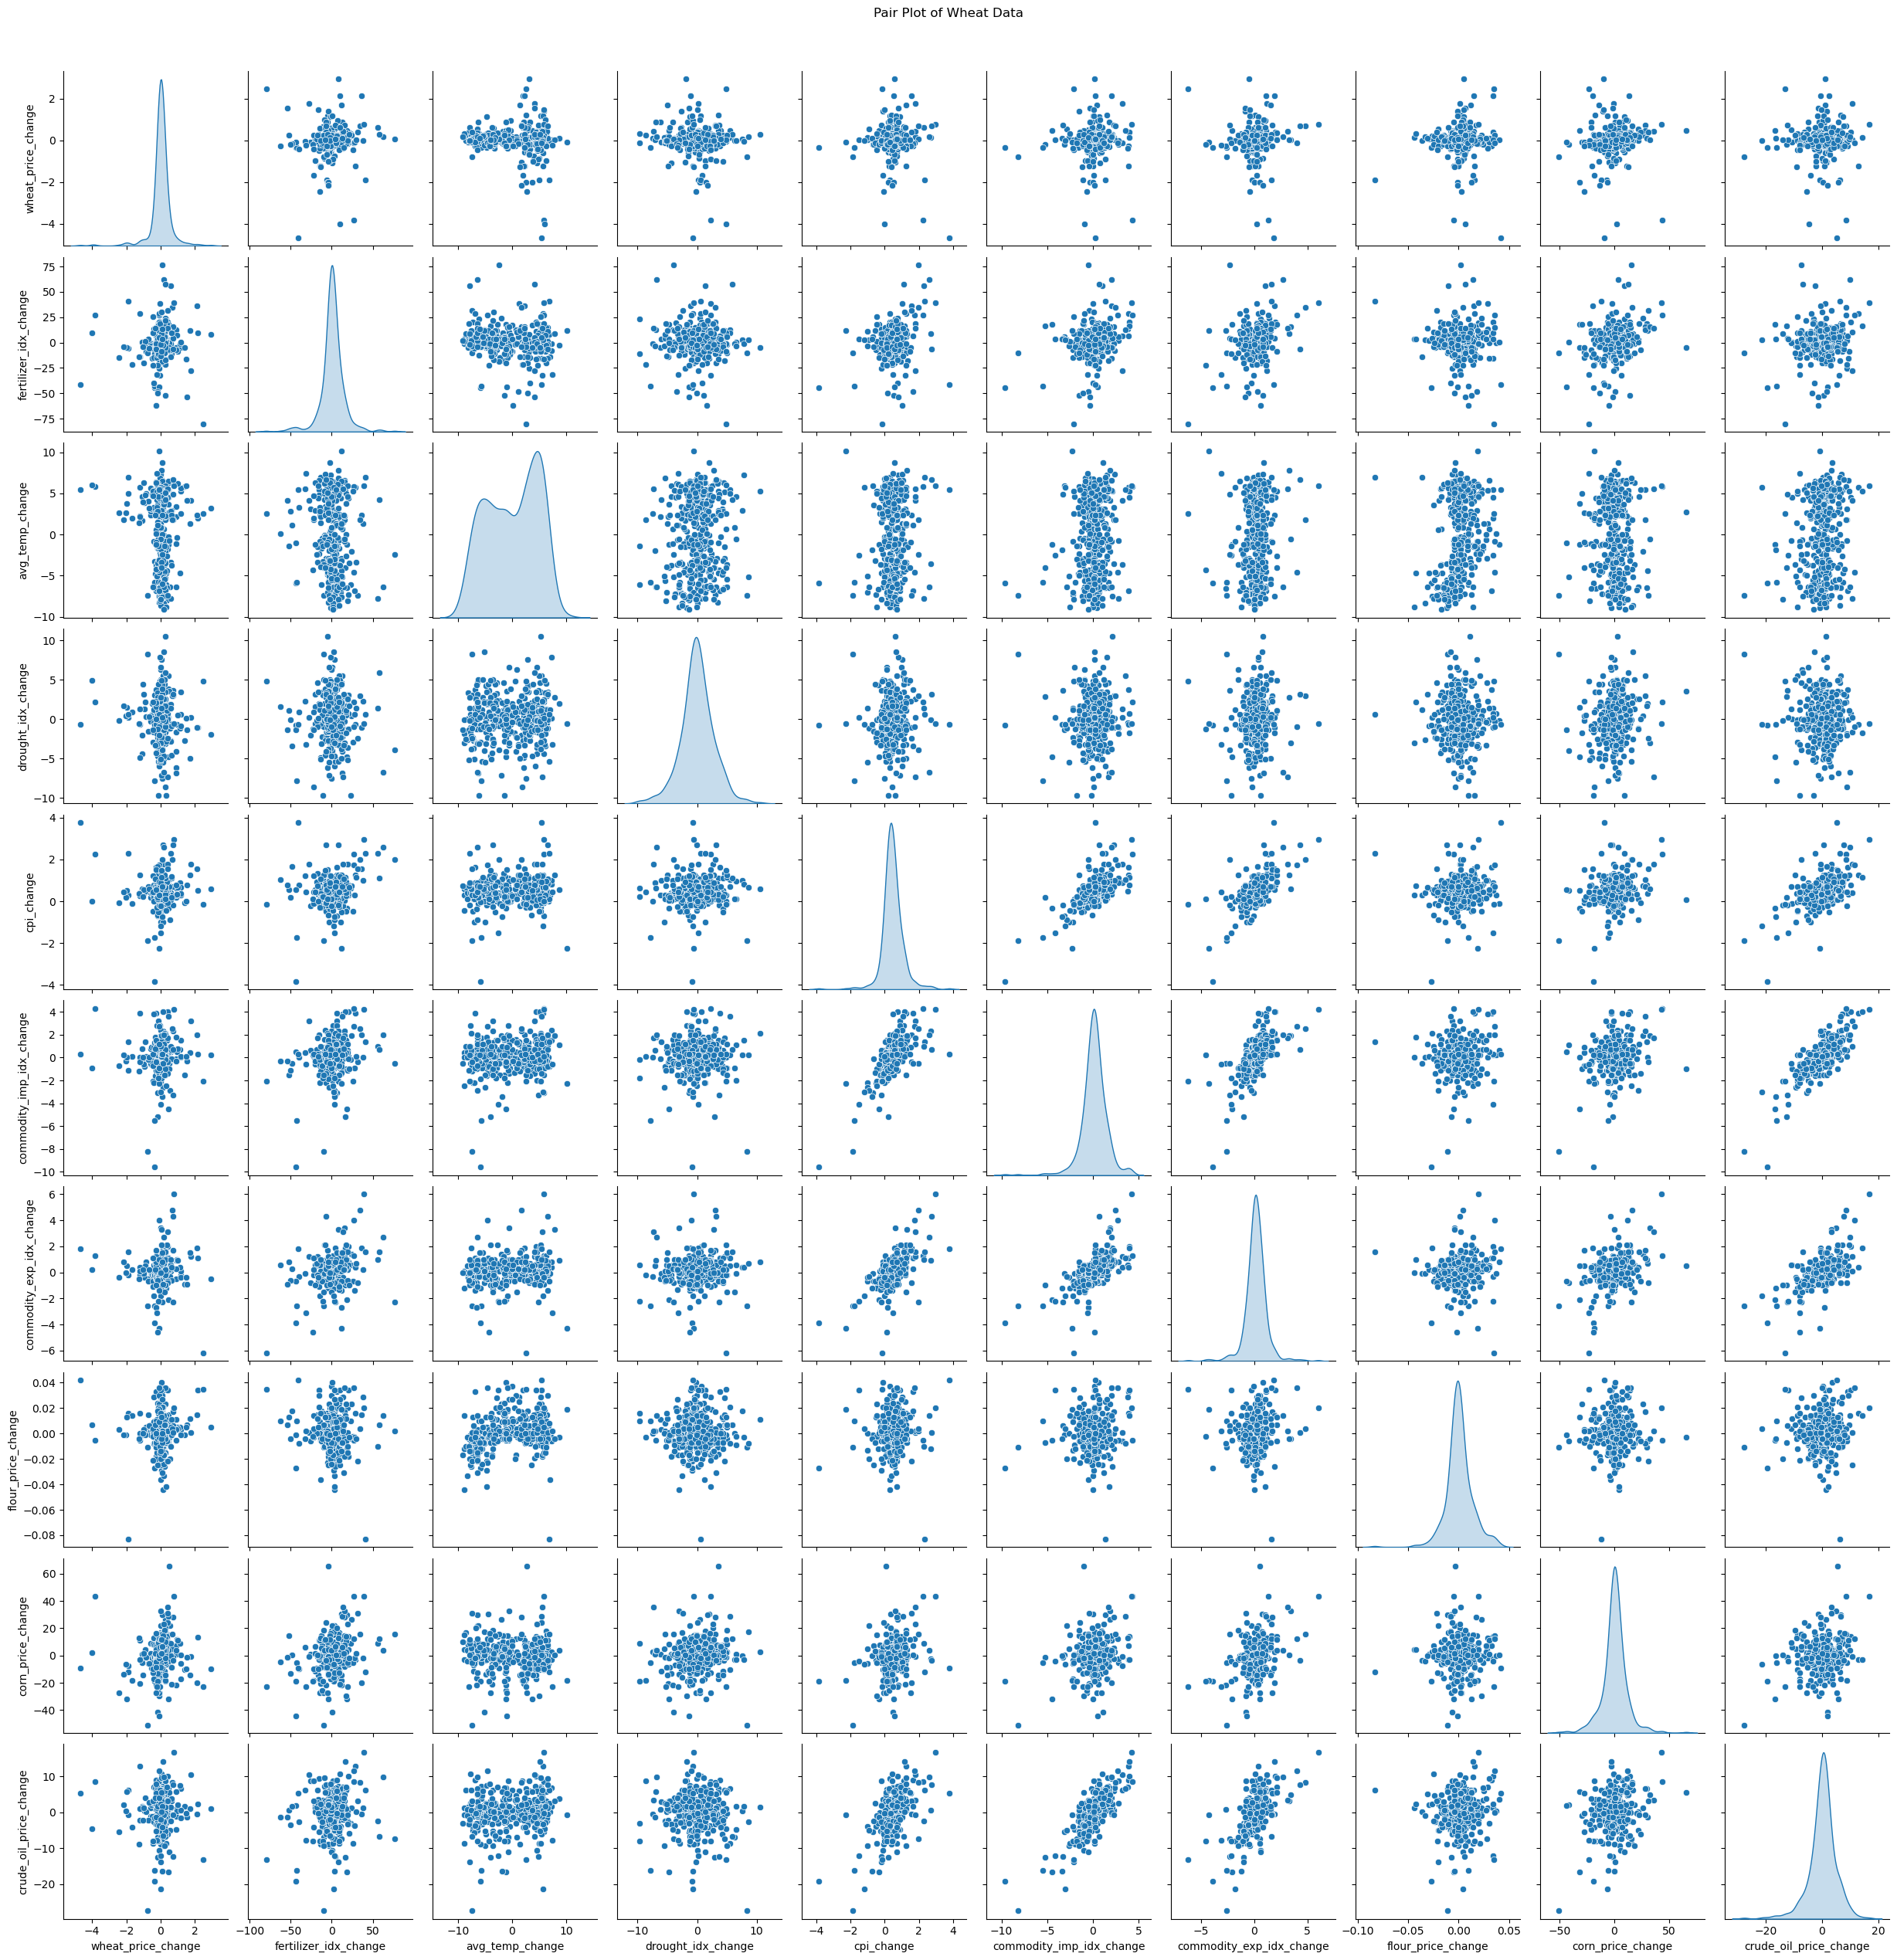

In [17]:
sns.pairplot(df_diff, diag_kind='kde')
plt.suptitle('Pair Plot of Wheat Data', y=1.02)
plt.show()

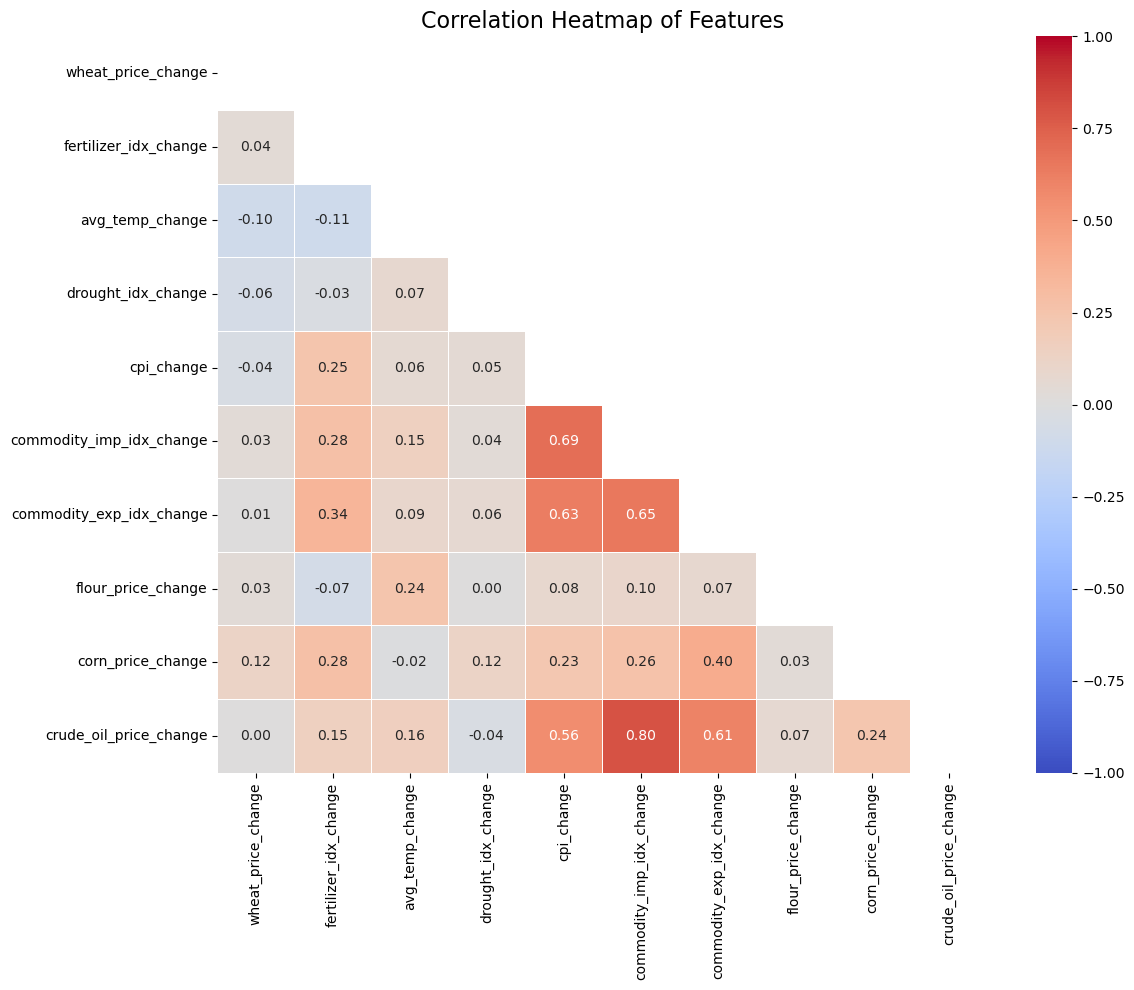

In [18]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_diff.corr(), dtype=bool))
sns.heatmap(df_diff.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.savefig('../Visualizations/Correlation_Heatmap.png')
plt.show()